In [1]:
import networkx as nx
from burn_tree import *

In [2]:
balanced_tree = nx.balanced_tree(r=2, h=5)
print(balanced_tree.nodes)
print(balanced_tree.degree(0))
print(balanced_tree.degree(62))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
2
1


In [3]:
burning_sequence = burn_tree(balanced_tree)
print(burning_sequence)

[0, 1, 3, 7, 15, 31]


In [4]:
# Position the nodes nicely into a tree shape
pos = nx.nx_pydot.pydot_layout(balanced_tree, prog='dot')
nx.draw(balanced_tree, pos=pos, with_labels=True)

In [5]:
from graph_utils import create_adj_mat
import os
import math

# Try burning all the trees in the ./trees directory
DIR_NAME = "./trees"
directory = os.fsencode(DIR_NAME)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".mat"):
        #print(filename)
        filepath = os.path.join(DIR_NAME, filename)
        with open(filepath, 'r') as file:
            adj_mat = create_adj_mat(filepath)
            tree = nx.convert_matrix.from_numpy_matrix(adj_mat)
            #pos = nx.nx_pydot.pydot_layout(tree, prog='dot')
            #nx.draw(tree, pos=pos, with_labels=True)
            
            burning_sequence = burn_tree(tree)
            print('b(G)<={0:2d} | n={1:2d} | ceil(sqrt(n))={2:2d} | {3:15} | {4:20}'.format(len(burning_sequence),
                                                                     tree.order(),
                                                                     math.ceil(math.sqrt(tree.order())),
                                                                     filename,
                                                                     str(burning_sequence)))

b(G)<= 2 | n= 6 | ceil(sqrt(n))= 3 | cross.mat       | [5, 3]              
b(G)<= 3 | n= 8 | ceil(sqrt(n))= 3 | ethane.mat      | [0, 7, 1]           
b(G)<= 2 | n= 5 | ceil(sqrt(n))= 3 | fork.mat        | [4, 2]              
b(G)<= 5 | n=32 | ceil(sqrt(n))= 6 | graph_1028.mat  | [0, 29, 28, 22, 19] 
b(G)<= 4 | n=13 | ceil(sqrt(n))= 4 | graph_156.mat   | [0, 6, 10, 2]       
b(G)<= 3 | n=11 | ceil(sqrt(n))= 4 | graph_164.mat   | [5, 8, 3]           
b(G)<= 3 | n=11 | ceil(sqrt(n))= 4 | graph_25135.mat | [9, 8, 3]           
b(G)<= 7 | n=46 | ceil(sqrt(n))= 7 | graph_26981.mat | [41, 17, 28, 22, 13, 43, 1]
b(G)<= 3 | n=12 | ceil(sqrt(n))= 4 | graph_27412.mat | [10, 8, 5]          
b(G)<= 4 | n=16 | ceil(sqrt(n))= 4 | graph_28507.mat | [0, 14, 11, 7]      
b(G)<= 4 | n=16 | ceil(sqrt(n))= 4 | graph_30698.mat | [13, 14, 12, 2]     
b(G)<= 4 | n=12 | ceil(sqrt(n))= 4 | graph_352.mat   | [0, 7, 10, 2]       
b(G)<= 4 | n=14 | ceil(sqrt(n))= 4 | graph_356.mat   | [0, 7, 11, 3]       
b(G)<

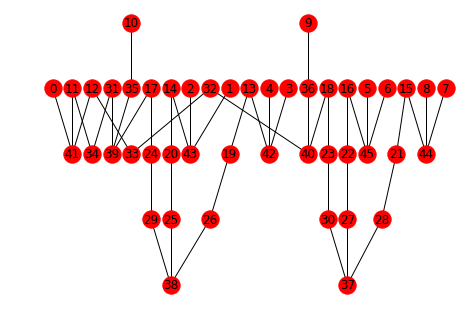

In [6]:
def show_graph(filepath):
    adj_mat = create_adj_mat(filepath)
    tree = nx.convert_matrix.from_numpy_matrix(adj_mat)
    pos = nx.nx_pydot.pydot_layout(tree, prog='dot')
    nx.draw(tree, pos=pos, with_labels=True)

filepath = './trees/graph_26981.mat'
show_graph(filepath)

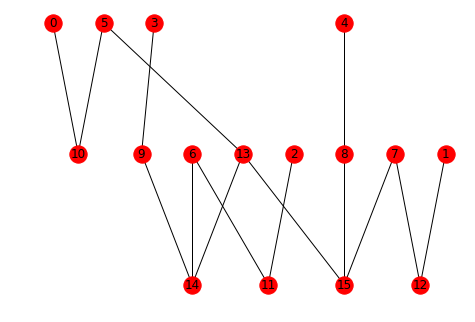

In [7]:
show_graph('./trees/graph_30698.mat')

In [8]:
from random import randint

# Generate random trees and burn them...
for i in range(100):
    n = randint(1, 125)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))
    burning_sequence = burn_tree(rand_tree)
    print('b(G)<={0:2d} | n={1:3d} | ceil(sqrt(n))={2:3d} | {3:20}'.format(len(burning_sequence),
                                                                     rand_tree.order(),
                                                                     math.ceil(math.sqrt(rand_tree.order())),
                                                                     str(burning_sequence)))
    if len(burning_sequence) > math.ceil(math.sqrt(rand_tree.order())):
        print("Burning sequence > sqrt(n)")
        pos = nx.nx_pydot.pydot_layout(rand_tree, prog='dot')
        nx.draw(rand_tree, pos=pos, with_labels=True)
    

b(G)<= 8 | n=102 | ceil(sqrt(n))= 11 | [8, 56, 28, 41, 99, 91, 14, 71]
b(G)<= 5 | n= 27 | ceil(sqrt(n))=  6 | [25, 14, 18, 21, 2] 
b(G)<= 4 | n= 14 | ceil(sqrt(n))=  4 | [0, 1, 8, 5]        
b(G)<= 7 | n= 61 | ceil(sqrt(n))=  8 | [0, 1, 52, 33, 5, 22, 14]
b(G)<= 9 | n=124 | ceil(sqrt(n))= 12 | [117, 66, 57, 95, 1, 23, 91, 75, 81]
b(G)<= 9 | n=118 | ceil(sqrt(n))= 11 | [91, 59, 20, 109, 1, 86, 68, 29, 50]
b(G)<= 8 | n= 89 | ceil(sqrt(n))= 10 | [10, 49, 18, 60, 23, 17, 82, 45]
b(G)<= 7 | n= 70 | ceil(sqrt(n))=  9 | [6, 48, 54, 13, 44, 17, 20]
b(G)<= 2 | n=  2 | ceil(sqrt(n))=  2 | [0, 1]              
b(G)<= 8 | n= 83 | ceil(sqrt(n))= 10 | [0, 66, 55, 19, 68, 76, 44, 67]
b(G)<= 4 | n= 14 | ceil(sqrt(n))=  4 | [0, 4, 7, 5]        
b(G)<= 4 | n= 14 | ceil(sqrt(n))=  4 | [0, 7, 1, 13]       
b(G)<= 9 | n=115 | ceil(sqrt(n))= 11 | [84, 111, 51, 47, 76, 91, 21, 33, 15]
b(G)<= 6 | n= 55 | ceil(sqrt(n))=  8 | [30, 36, 10, 31, 11, 2]
b(G)<= 7 | n= 71 | ceil(sqrt(n))=  9 | [33, 58, 9, 32, 4, 7, 1

In [9]:
# Try burning all the trees in the ./trees directory
DIR_NAME = "./trees"
directory = os.fsencode(DIR_NAME)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".mat"):
        #print(filename)
        filepath = os.path.join(DIR_NAME, filename)
        with open(filepath, 'r') as file:
            adj_mat = create_adj_mat(filepath)
            tree = nx.convert_matrix.from_numpy_matrix(adj_mat)
            #pos = nx.nx_pydot.pydot_layout(tree, prog='dot')
            #nx.draw(tree, pos=pos, with_labels=True)
            
            burning_sequence = burn_tree_using_centers(tree, update_root=True)
            print('b(G)<={0:2d} | n={1:2d} | ceil(sqrt(n))={2:2d} | {3:15} | {4:20}'.format(len(burning_sequence),
                                                                     tree.order(),
                                                                     math.ceil(math.sqrt(tree.order())),
                                                                     filename,
                                                                     str(burning_sequence)))

b(G)<= 3 | n= 6 | ceil(sqrt(n))= 3 | cross.mat       | [3, 5, 0]           
b(G)<= 3 | n= 8 | ceil(sqrt(n))= 3 | ethane.mat      | [0, 7, 1]           
b(G)<= 3 | n= 5 | ceil(sqrt(n))= 3 | fork.mat        | [2, 4, 0]           
b(G)<= 5 | n=32 | ceil(sqrt(n))= 6 | graph_1028.mat  | [0, 28, 29, 23, 16] 
b(G)<= 4 | n=13 | ceil(sqrt(n))= 4 | graph_156.mat   | [5, 9, 12, 2]       
b(G)<= 4 | n=11 | ceil(sqrt(n))= 4 | graph_164.mat   | [0, 7, 9, 1]        
b(G)<= 4 | n=11 | ceil(sqrt(n))= 4 | graph_25135.mat | [4, 9, 5, 3]        
b(G)<= 7 | n=46 | ceil(sqrt(n))= 7 | graph_26981.mat | [24, 12, 28, 22, 13, 43, 1]
b(G)<= 3 | n=12 | ceil(sqrt(n))= 4 | graph_27412.mat | [10, 8, 5]          
b(G)<= 4 | n=16 | ceil(sqrt(n))= 4 | graph_28507.mat | [12, 15, 10, 6]     
b(G)<= 4 | n=16 | ceil(sqrt(n))= 4 | graph_30698.mat | [13, 5, 12, 2]      
b(G)<= 4 | n=12 | ceil(sqrt(n))= 4 | graph_352.mat   | [4, 6, 9, 0]        
b(G)<= 4 | n=14 | ceil(sqrt(n))= 4 | graph_356.mat   | [6, 10, 13, 3]      
b(G)<

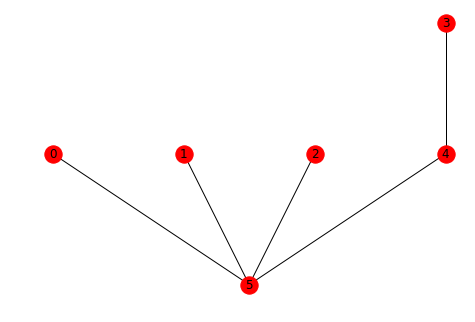

In [11]:
show_graph('./trees/cross.mat')

So far, seems like burning without updating the root with a central vertex is best. Burning example trees from the `/trees` directory, both give sequences that are always at most sqrt(n), but updating the root makes the sequence a bit longer in certain instances. From trying the original (no update) algorithm on random trees, some trees were found that took > sqrt(n) rounds to burn. Maybe updating with centers guarantees at most sqrt(n) rounds?

Iteration: 0
Updating root produces sequences taking at most sqrt(n) rounds while a fixed root does not.
Burning Sequence (no update): [15, 18, 19, 23, 22, 3]
Burning sequence (update root): [7, 6, 13, 16, 3]


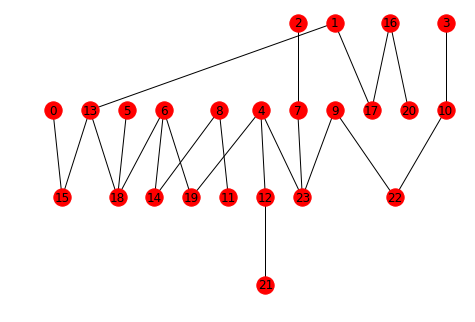

In [14]:
# Try to find a tree where updating the root produces a sequence that takes at 
# most sqrt(n) rounds, but not updating takes longer
i = 0
while True:   
    if i % 1000 == 0:
        print("Iteration:", i)
    n = randint(1, 125)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))
    burning_sequence = burn_tree(rand_tree)
    burning_sequence_update = burn_tree_using_centers(rand_tree, update_root=True)
    
    upper_bound = math.ceil(math.sqrt(rand_tree.order()))
    if len(burning_sequence_update) > upper_bound:
        print("Burning with updated root still can take > sqrt(n) rounds")
        print("Burning Sequence (no update):", burning_sequence)
        print("Burning Sequence (update root):", burning_sequence_update)
        pos = nx.nx_pydot.pydot_layout(rand_tree, prog='dot')
        nx.draw(rand_tree, pos=pos, with_labels=True)
        break
    elif len(burning_sequence) > upper_bound and len(burning_sequence_update) <= upper_bound:
        print("Updating root produces sequences taking at most sqrt(n) rounds while a fixed root does not.")
        print("Burning Sequence (no update):", burning_sequence)
        print("Burning Sequence (update root):", burning_sequence_update)
        pos = nx.nx_pydot.pydot_layout(rand_tree, prog='dot')
        nx.draw(rand_tree, pos=pos, with_labels=True)
        break
        
    i += 1
        

Iteration: 0
Burning with updated root still can take > sqrt(n) rounds
Burning Sequence (no update): [0, 9, 22, 5, 12]
Burning Sequence (update root): [21, 23, 20, 19, 13, 12]


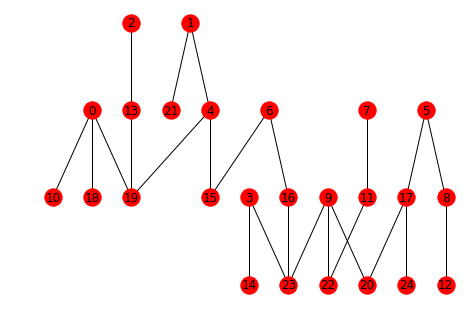

In [16]:
# Try to find a tree where updating the root produces a sequence that takes 
# more than sqrt(n) rounds to burn
i = 0
while True:   
    if i % 1000 == 0:
        print("Iteration:", i)
    n = randint(1, 125)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))
    burning_sequence = burn_tree(rand_tree)
    burning_sequence_update = burn_tree_using_centers(rand_tree, update_root=True)
    
    upper_bound = math.ceil(math.sqrt(rand_tree.order()))
    if len(burning_sequence_update) > upper_bound:
        print("Burning with updated root still can take > sqrt(n) rounds")
        print("Burning Sequence (no update):", burning_sequence)
        print("Burning Sequence (update root):", burning_sequence_update)
        pos = nx.nx_pydot.pydot_layout(rand_tree, prog='dot')
        nx.draw(rand_tree, pos=pos, with_labels=True)
        break
        
    i += 1
        

In [19]:
# Burn some random trees with both algorithms
for i in range(25):
    n = randint(1, 125)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))
    burning_sequence = burn_tree(rand_tree)
    burning_sequence_update = burn_tree_using_centers(rand_tree, update_root=True)
    print('Length (No Update/Update): {0:1d}/{1:1d} | n={2:3d} | ceil(sqrt(n))={3:3d} | {4:20}'.format(
        len(burning_sequence),
        len(burning_sequence_update),
        rand_tree.order(),
        math.ceil(math.sqrt(rand_tree.order())),
        str(burning_sequence))
    )
   

Length (No Update/Update): 8/8 | n= 98 | ceil(sqrt(n))= 10 | [55, 29, 72, 38, 67, 28, 12, 5]
Length (No Update/Update): 7/7 | n= 58 | ceil(sqrt(n))=  8 | [1, 5, 13, 28, 45, 24, 31]
Length (No Update/Update): 3/3 | n=  7 | ceil(sqrt(n))=  3 | [0, 6, 1]           
Length (No Update/Update): 6/6 | n= 44 | ceil(sqrt(n))=  7 | [0, 28, 7, 9, 40, 2]
Length (No Update/Update): 4/4 | n= 14 | ceil(sqrt(n))=  4 | [9, 4, 13, 8]       
Length (No Update/Update): 9/9 | n=109 | ceil(sqrt(n))= 11 | [13, 4, 14, 8, 55, 66, 90, 73, 81]
Length (No Update/Update): 7/8 | n= 80 | ceil(sqrt(n))=  9 | [18, 56, 41, 26, 5, 4, 54]
Length (No Update/Update): 4/4 | n= 17 | ceil(sqrt(n))=  5 | [5, 13, 12, 8]      
Length (No Update/Update): 6/6 | n= 36 | ceil(sqrt(n))=  6 | [0, 34, 13, 16, 15, 32]
Length (No Update/Update): 9/8 | n=105 | ceil(sqrt(n))= 11 | [0, 11, 57, 64, 65, 10, 51, 45, 85]
Length (No Update/Update): 9/9 | n=124 | ceil(sqrt(n))= 12 | [101, 110, 11, 106, 59, 80, 107, 121, 66]
Length (No Update/Upda

### Conclusion

sometimes updating root gives a better sequence, and sometimes using fixed root gives a better sequence. Both almost always give sequences of length <= sqrt(n), but both can sometimes give longer sequences.